# Desafío - Regularización

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección
correspondiente.

## Descripción

* En esta ocasión utilizaremos datos de la composición química de muestras de vino.
* Nuestro propósito será tratar de predecir su calidad a partir de su composición química.
* Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    * Identifique el tipo de datos de cada columna.
    *Identifique outliers univariados y multivariados. Los primeros los puede encontrar
realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares
de atributos.
    * Encuentre la cantidad de valores faltantes en cada columna.
    * Grafique la distribución empírica de cada atributo

## Ejercicio 1: Preparación del Ambiente de Trabajo
* Importe las librerías básicas
* Importe los métodos asociados a regularización
* Importe la base de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from cv_error import *
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn-darkgrid')

In [78]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

In [5]:
df = pd.read_csv('winequality-red.csv')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Ejercicio 2: Análisis exploratorio
* Identifique el tipo de datos de cada columna.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando
boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos

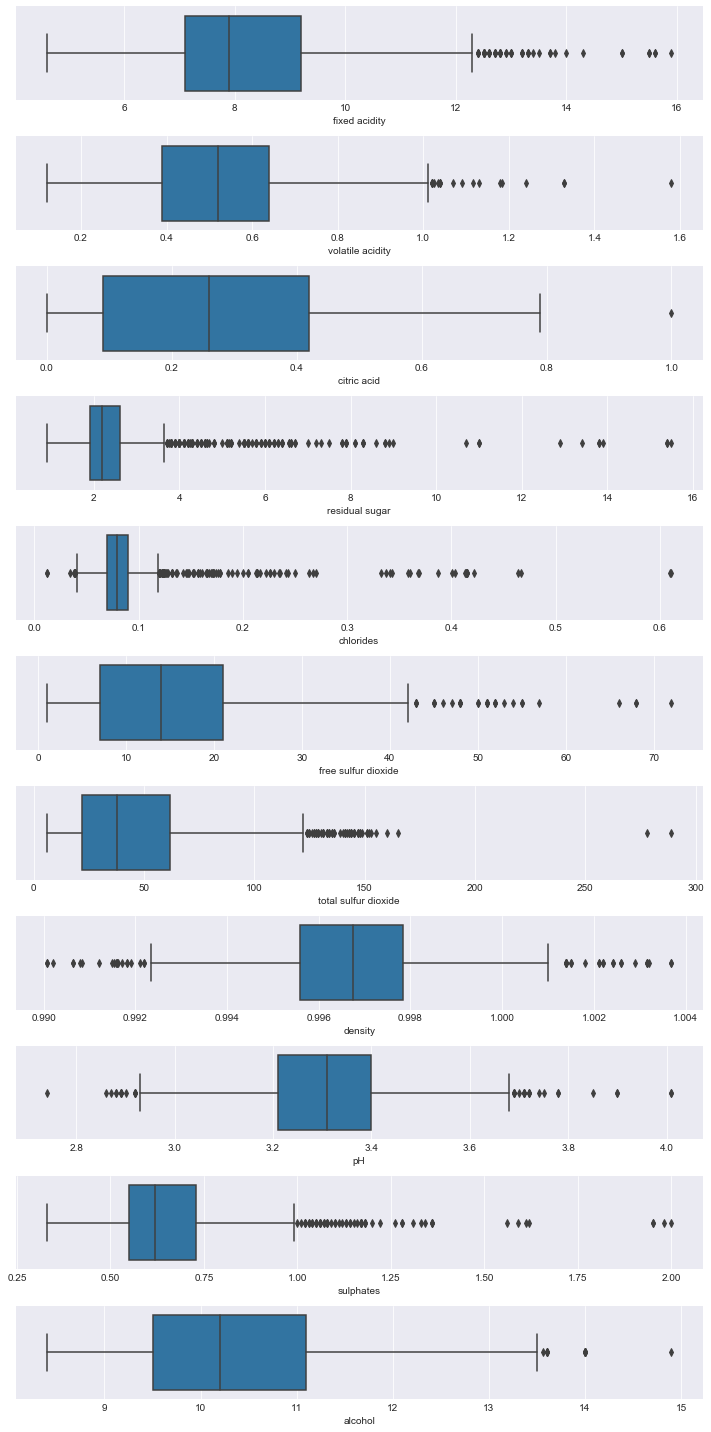

In [35]:
plt.rcParams['figure.figsize'] = (10,20)
fig, ax = plt.subplots(11, 1)
k = 0
for col in df.iloc[:, :-1].columns:
    sns.boxplot(df[col], ax=ax[k])
    k += 1
plt.tight_layout()

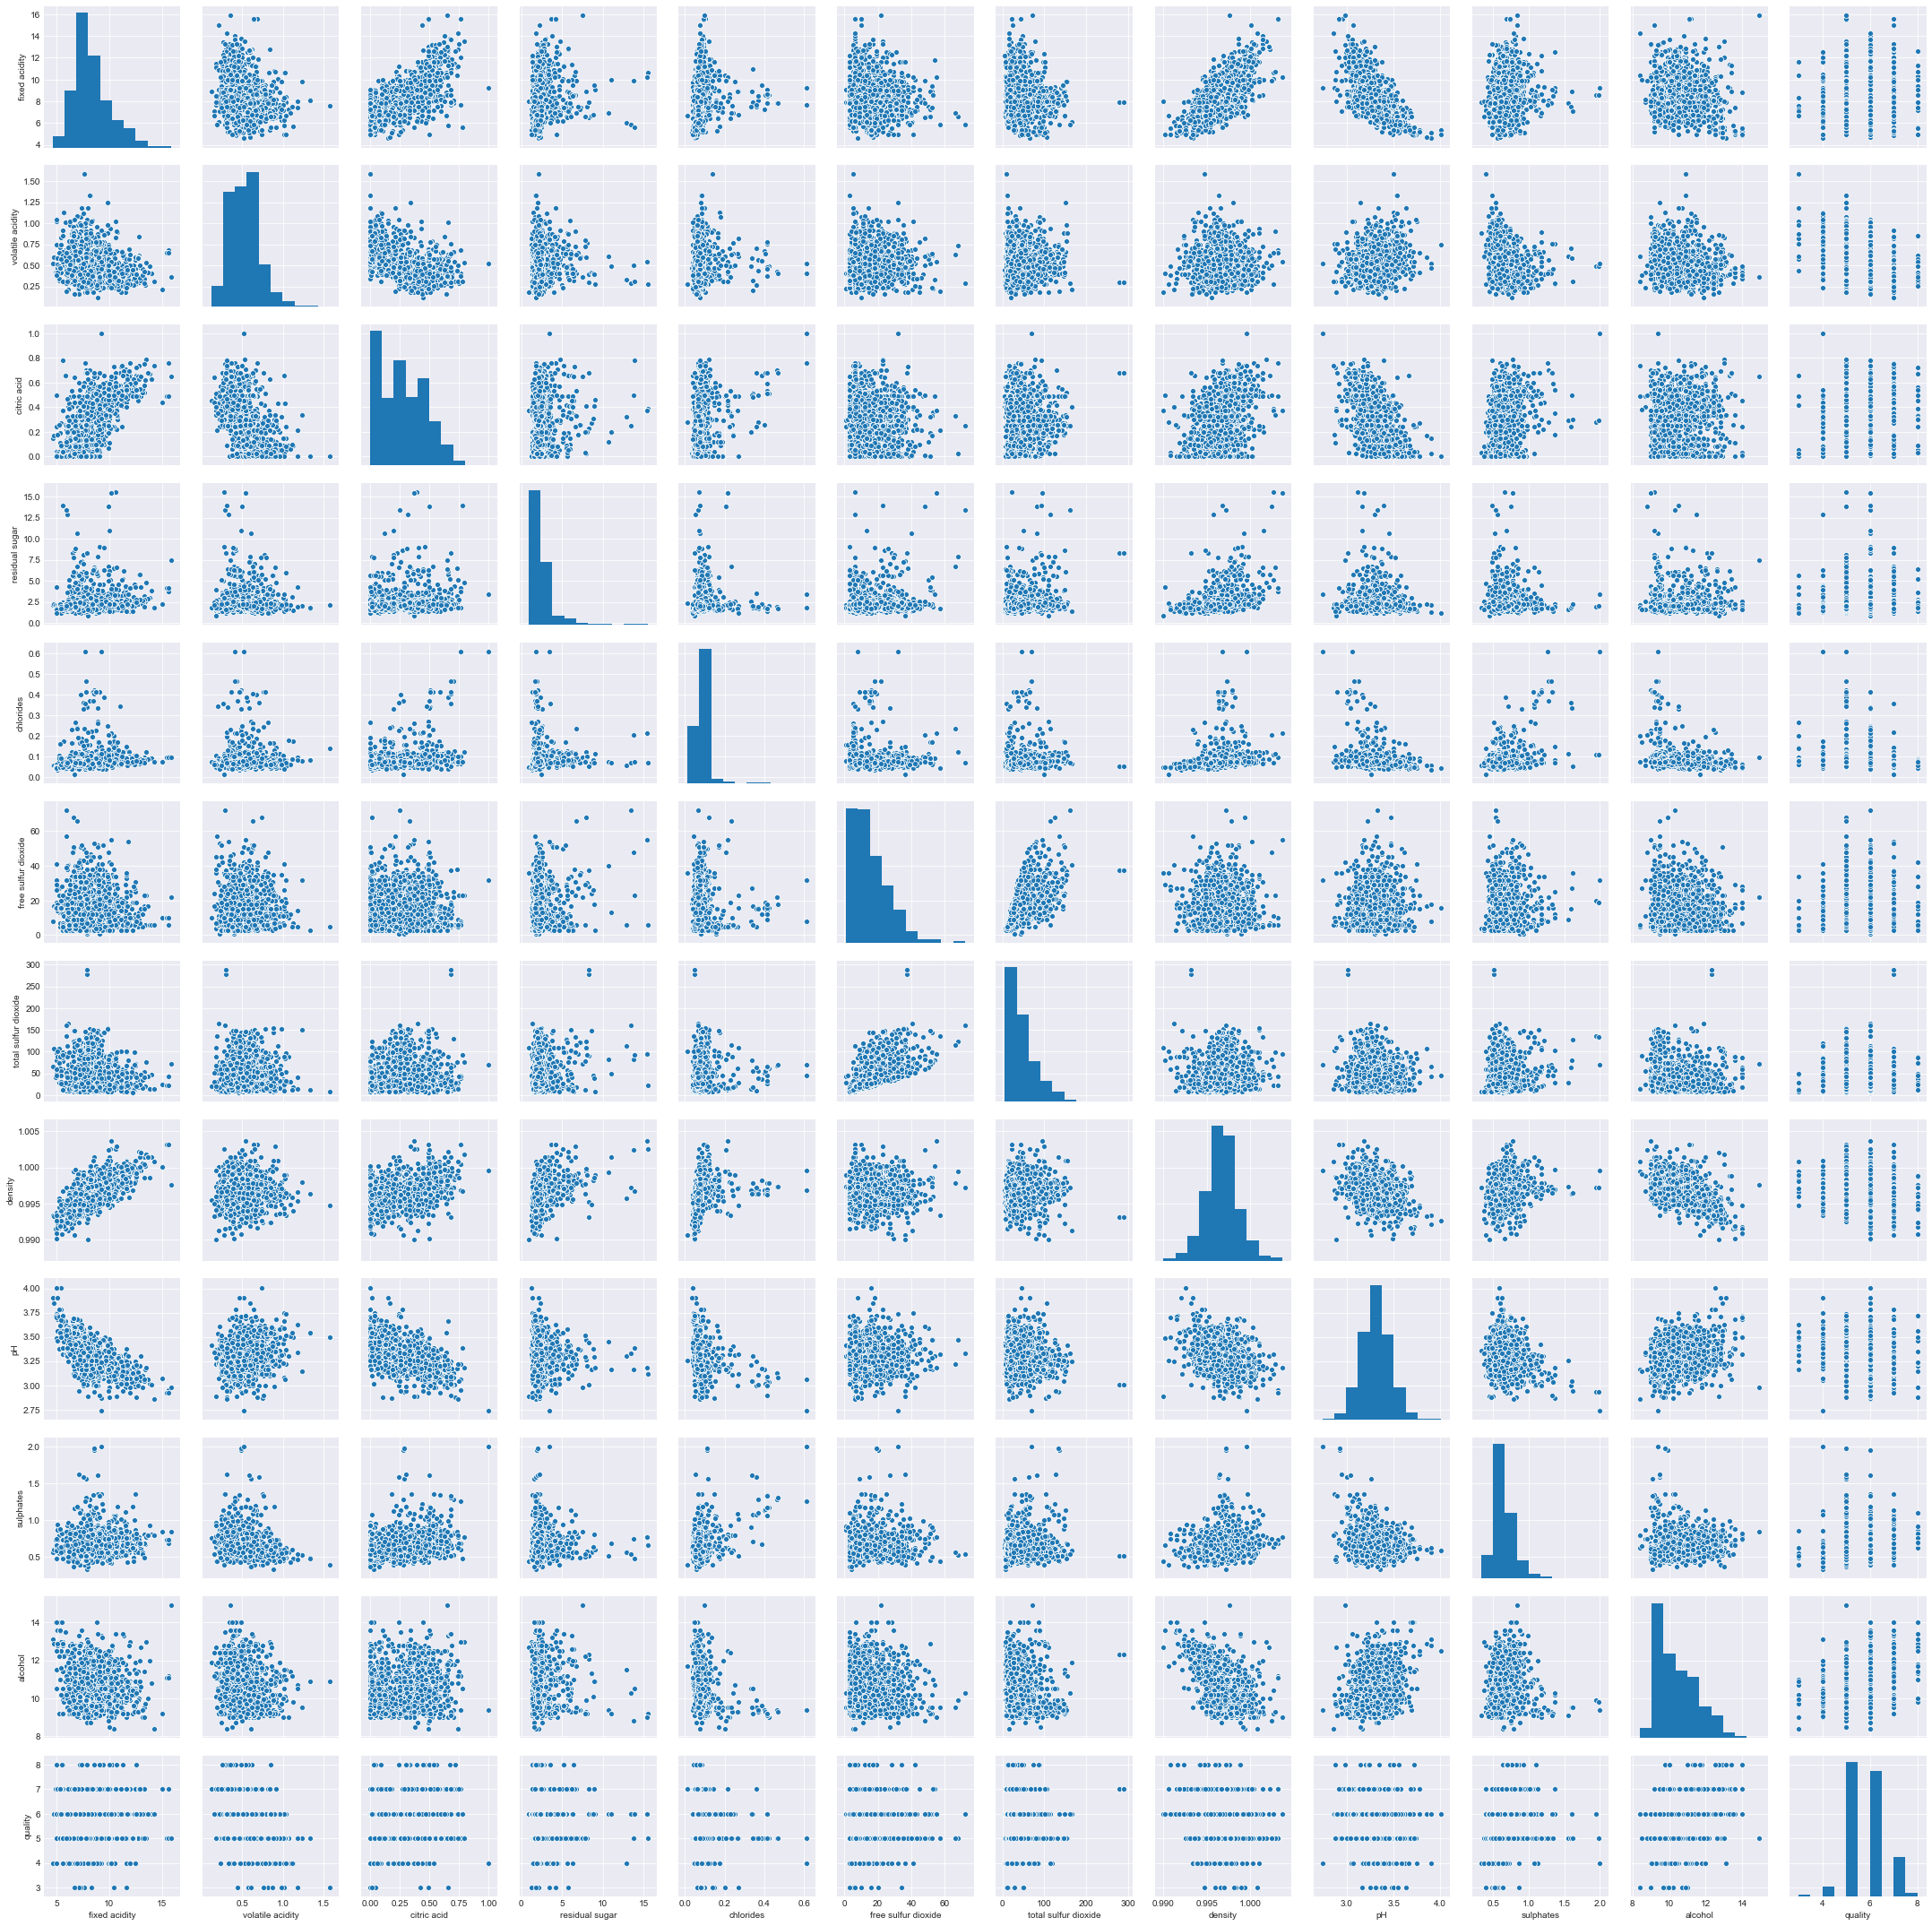

In [34]:
sns.pairplot(df)

## Ejercicio 3: Regularización de modelos
* Genere tres modelos, correspondientes a RidgeCV , LassoCV y ElasticNetCV . Para cada
uno de ellos implemente los siguientes pasos:
    * Entrene los modelos con 10 validaciones cruzadas.
    * Extraiga los coeficientes estimados, el mejor valor alpha, MAE ( median_absolute_error )
y RMSE ( mean_squared_error ) asociado a cada modelo.
    * En base a la información solicitada, responda lo siguiente:
    * ¿Qué modelo presenta un mejor desempeño en base a las métricas?
    * ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

In [80]:
def model_generator(df, y, model_type, cv, alphas):
    X = df.drop([y], axis=1)
    N = X.shape[0]
    X.insert(X.shape[1], 'intercept', np.ones(N))
    y = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=63) 
    names_regressors = X_train.columns
    coefs, cv_err = [], []
    if model_type == 'ridge':
        model = Ridge(fit_intercept=True)
        for a in alphas:
            model.set_params(alpha=a)
            model.fit(X_train, y_train)
            coefs.append(model.coef_)
            dummy, cv_err_estimates = cv_error(X_train, y_train, k = 10, method= 'ridge', alpha = a)
            cv_err.append(np.mean(cv_err_estimates))
        model_cv = RidgeCV(cv=cv)
        model = model_cv.fit(X_train, y_train)
    if model_type == 'lasso':
        model = Lasso(fit_intercept=True)
        for a in alphas:
            model.set_params(alpha=a)
            model.fit(X_train, y_train)
            coefs.append(model.coef_)
            dummy, cv_err_estimates = cv_error(X_train, y_train, k = 10, method= 'lasso', alpha = a)
            cv_err.append(np.mean(cv_err_estimates))
        model_cv = LassoCV(cv=cv)
        model = model_cv.fit(X_train, y_train)
    if model_type == 'enet':
        model = ElasticNet(fit_intercept=True)
        for a in alphas:
            model.set_params(alpha=a)
            model.fit(X_train, y_train)
            coefs.append(model.coef_)
            dummy, cv_err_estimates = cv_error(X_train, y_train, k = 10, method= 'enet', alpha = a)
            cv_err.append(np.mean(cv_err_estimates))
        model_cv = ElasticNetCV(cv=cv)
        model = model_cv.fit(X_train, y_train)
    ax = plt.gca()
    for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
        plt.plot(alphas, y_arr, label=label) 
        ax.set_xscale('log')
        plt.legend(loc=1)
    ax = plt.gca()
    plt.plot(alphas, np.sqrt(cv_err), 'o-')
    ax.set_xscale('log')
    coefs = model.coef_
    alpha = model.alpha_
    mae = median_absolute_error(model.predict(X_test), y_test)
    mse = mean_squared_error(model.predict(X_test), y_test)
    r2 = r2_score(model.predict(X_test), y_test)
    print("coefs:", coefs)
    print("alpha:", alpha)
    print("R2:", r2)
    print("MAE:", mae)
    print("MSE:", mse)

coefs: [-2.27053640e-03 -1.10109205e+00 -1.62073941e-01  1.84606011e-02
 -2.53114036e+00  4.87710058e-03 -3.89391387e-03 -1.65055990e-01
 -5.76797371e-01  8.72790816e-01  2.82129840e-01  0.00000000e+00]
alpha: 0.1
R2: -0.7973459621552195
MAE: 0.39031817352094045
MSE: 0.4165432905038375


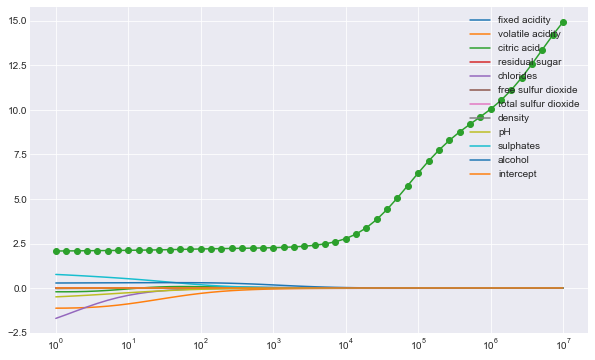

In [81]:
alphas = np.logspace(0,7, base=10)
model_generator(df, 'quality', 'ridge', 10, alphas)

coefs: [ 0.02383626 -1.02947663 -0.          0.00787683 -0.          0.00507444
 -0.00354891 -0.         -0.01077279  0.4810353   0.29666841  0.        ]
alpha: 0.004640917805030507
R2: -1.0062082508805728
MAE: 0.3968801204793113
MSE: 0.41020856341983064


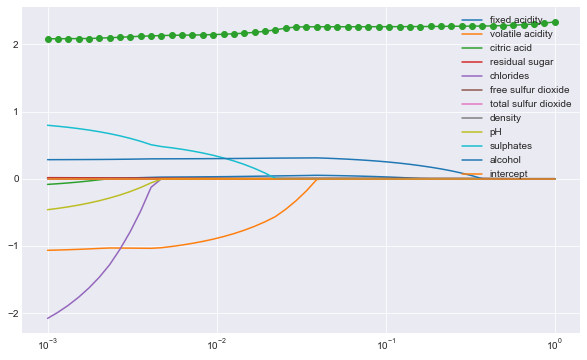

In [82]:
alphas = np.logspace(0, -3, base=10)
model_generator(df, 'quality', 'lasso', 10, alphas)

coefs: [ 0.02728315 -0.89252841 -0.          0.00691821 -0.          0.00553897
 -0.00362849 -0.         -0.033025    0.44167792  0.3016434   0.        ]
alpha: 0.009281835610061016
R2: -1.1114143144998985
MAE: 0.40233310350525375
MSE: 0.41217536682661327


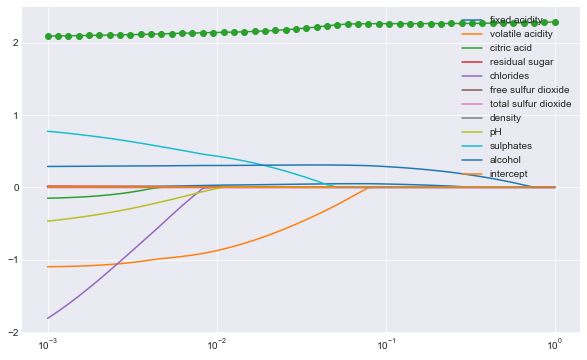

In [83]:
alphas = np.logspace(0, -3, base=10)
model_generator(df, 'quality', 'enet', 10, alphas)

Finalmente podemos concluir en base a la información recopilada los modelos ofrecen un desempeño similar (no igual). Sin mebargo podemos inclinarnos por el modelo Ridge, puesto que tiene un lamda = 0.1 que penaliza mas la función objetivo, ademas de poseer un MAE mas bajo que el resto.